## Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from keras.utils import get_file
import os

data_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3364/31151/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1681387883&Signature=b%2Fa6hZN1sEaEs4Jhi9Fo1j8HvGjCcXvfw0nuioE7YmaGdCPDQKm4ldyLYh7zg7RtKrHVSABxHa2DJ0qHXbFVpEXszHuExNbkUnelCl7mbEh12g4AH9jMemvZMV61II%2FnxO28t6Y%2B4fK1RprqACBwo4I1SSCeooQ8Qg2qEgNS4OvbYlYnz%2BSJduBXx0UWO8lVL%2BPNJaBRjdSWOD9CQATrf6aelJqlit6Ll1oNGA6ccyMMdXHuw2sc6t8VRR0UySwtpnfVymJmpWi40HDkmoZ4pD86njmmSYcrfquE4pNJFN0M2TywokF2cZw1wxQ64eVWLm1YjlSdn5H2AA2RrNOlAA%3D%3D&response-content-disposition=attachment%3B+filename%3Dchallenges-in-representation-learning-facial-expression-recognition-challenge.zip'

zip_file = get_file(fname = 'challenges-in-representation-learning-facial-expression-recognition-challenge.zip', origin = data_url, extract = True)

299063632/299063632 [==============================] - 1s 0us/step


In [ ]:
base_dir, extension = os.path.splitext(zip_file)

print(base_dir + extension)

/root/.keras/datasets/challenges-in-representation-learning-facial-expression-recognition-challenge.zip


In [ ]:
print(os.listdir('/root/.keras/datasets'))

['example_submission.csv', 'icml_face_data.csv', 'challenges-in-representation-learning-facial-expression-recognition-challenge.zip', 'train.csv', 'test.csv', 'fer2013.tar.gz']


In [ ]:
val = pd.read_csv('/root/.keras/datasets/icml_face_data.csv', )

val = val.rename(columns = {' Usage': 'usage', ' pixels': 'pixels'})

In [ ]:
val.head()

val['usage'] = val['usage'] = 'Testing'

val.head()

,emotion,usage,pixels
0,0,Testing,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Testing,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Testing,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Testing,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Testing,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
train = pd.read_csv('/root/.keras/datasets/train.csv')

In [ ]:
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
test = pd.read_csv('/root/.keras/datasets/test.csv')

In [ ]:
test.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [ ]:
print(test.shape)
print(train.shape)
print(val.shape)

(7178, 1)
(28709, 2)
(35887, 3)


# EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pixels  7178 non-null   object
dtypes: object(1)
memory usage: 56.2+ KB


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   usage    35887 non-null  object
 2   pixels   35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
emotion = {0:'Angry', 
           1:'Disgust', 
           2:'Fear', 
           3:'Happy', 
           4:'Sad', 
           5:'Surprised', 
           6:'Neutral'}

emotion_graph = ['Angry', 
           'Disgust', 
           'Fear', 
           'Happy', 
           'Sad', 
           'Surprised', 
           'Neutral']

In [ ]:
train['emotion'].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [ ]:
#plot = sns.countplot(train['emotion'])

In [ ]:
train_df = train[train['emotion'] == 1]
train_df = train_df

df_repeated = pd.concat([train_df]*10, ignore_index=True)

train = pd.concat([train, df_repeated], ignore_index=True, sort=False)

In [ ]:
train['emotion'].value_counts()

3    7215
6    4965
4    4830
1    4796
2    4097
0    3995
5    3171
Name: emotion, dtype: int64

In [ ]:
y_train = train['emotion']
y_val = val['emotion']

train['pixels'] = train['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
val['pixels'] = val['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))

X_train = train['pixels'] 
X_val = val['pixels']

X_train = np.stack(X_train, axis = 0) 
X_val = np.stack(X_val, axis = 0)

X_train.shape, X_val.shape

((33069, 48, 48, 1), (35887, 48, 48, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

y_train.shape

(33069, 7)

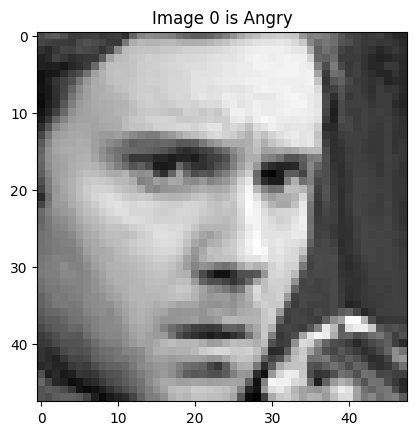

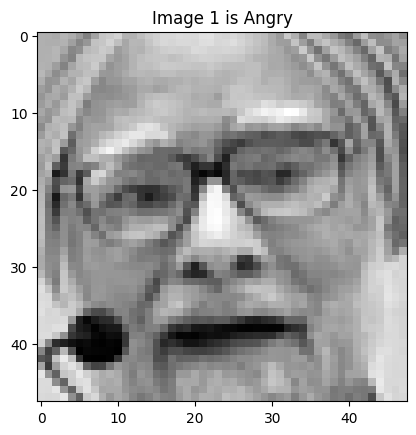

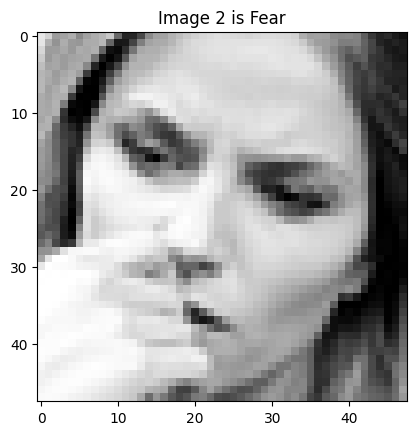

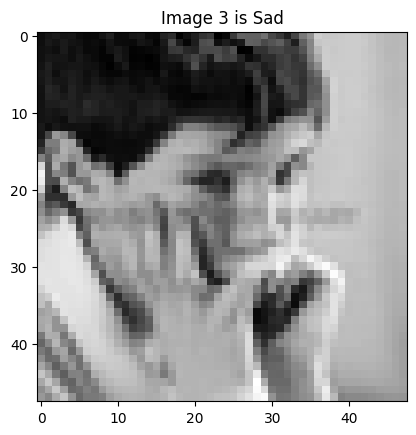

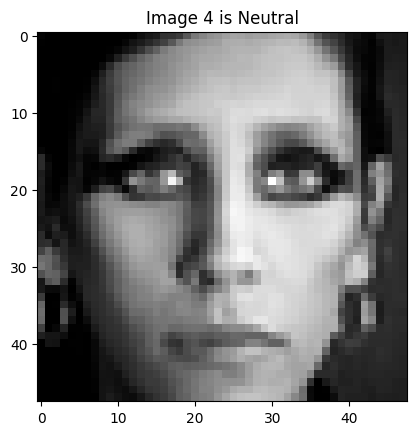

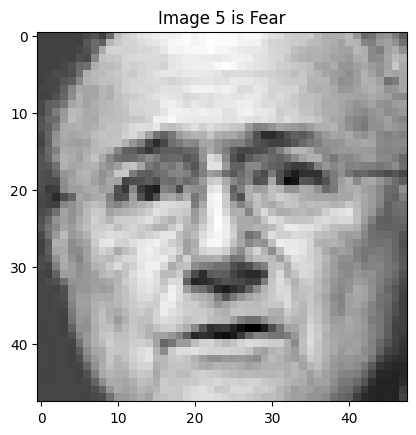

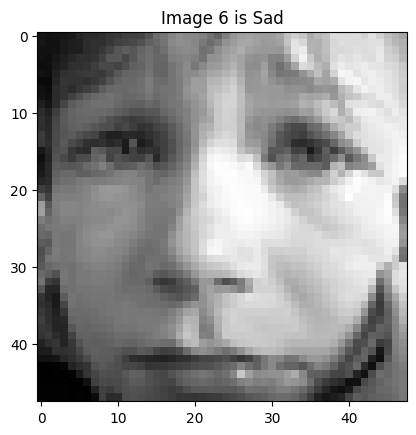

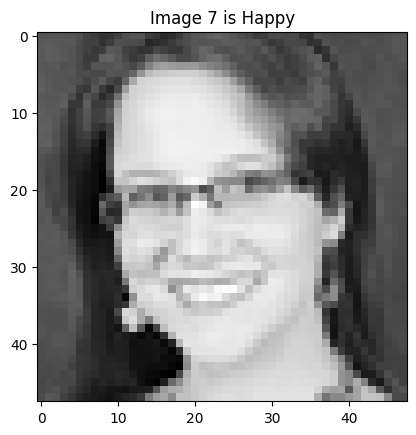

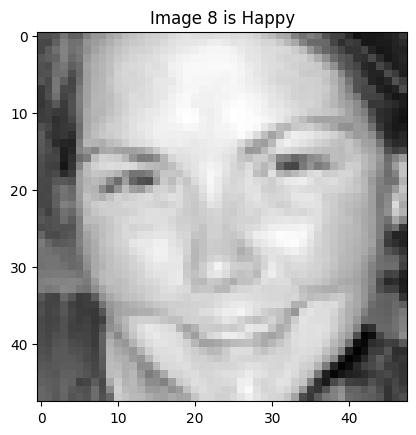

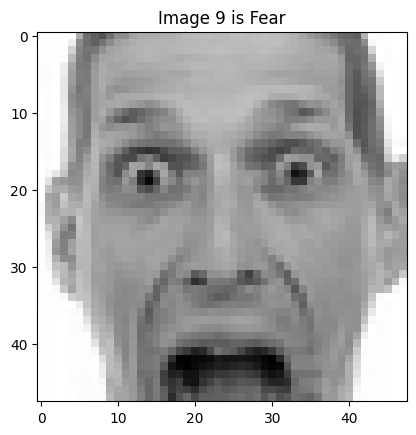

In [ ]:
for i in range(10):
  plt.figure()

  plt.imshow(X_train[i].reshape((48,48)), cmap='gray')
  
  item = y_train[i].argmax(axis = 0)
  image = emotion[item]
  
  plt.title('Image %d is %s' % (i, image))

# Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2, 
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_iter = train_datagen.flow(X_train, y_train)

test_iter = test_datagen.flow(X_train,y_train)

In [ ]:
train_iter.reset()

batchX, batchy = train_iter.next()

Xmin = batchX.min()
Xmax = batchX.max()

ymin = batchy.min()
ymax = batchy.max()

print('Batch of shape X =', (batchX.shape), ', X min = %d, X max = %d' % (Xmin, Xmax))
print('Batch of shape y =', (batchy.shape), ', y min = %d, y max = %d' % (ymin, ymax))

Batch of shape X = (32, 48, 48, 1) , X min = 0, X max = 1
Batch of shape y = (32, 7) , y min = 0, y max = 1


<ipython-input-37-49d7c0718fc8>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


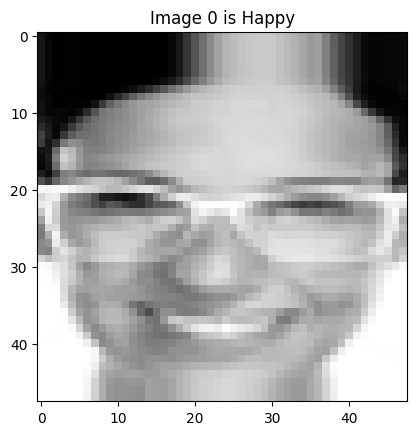

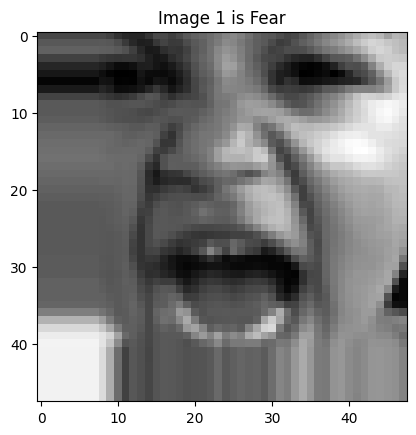

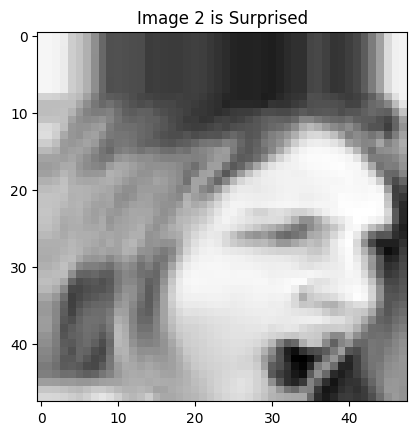

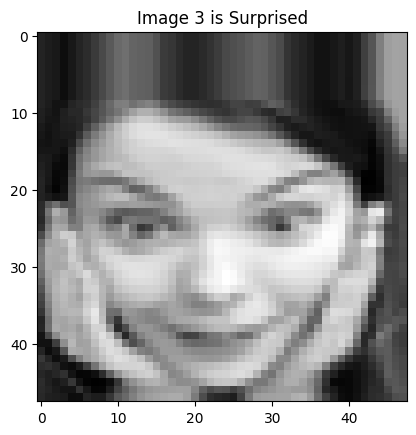

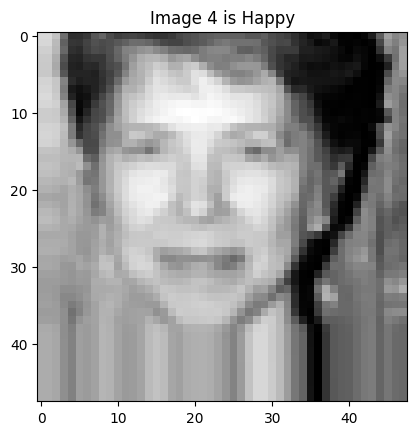

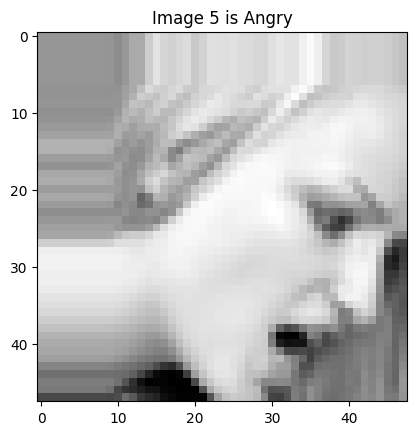

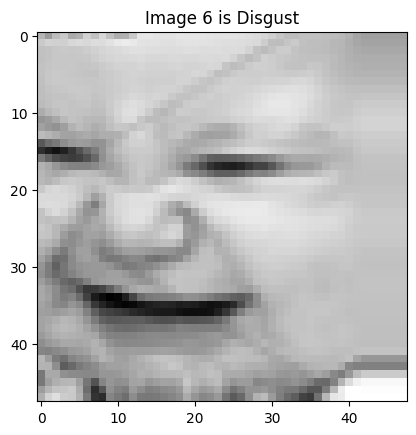

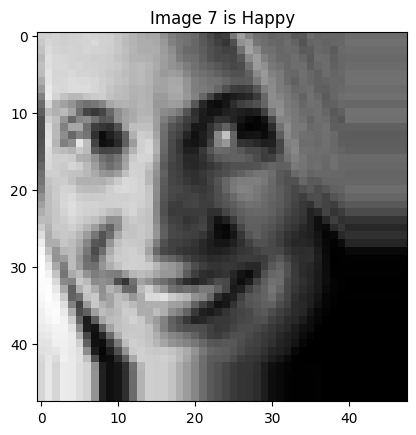

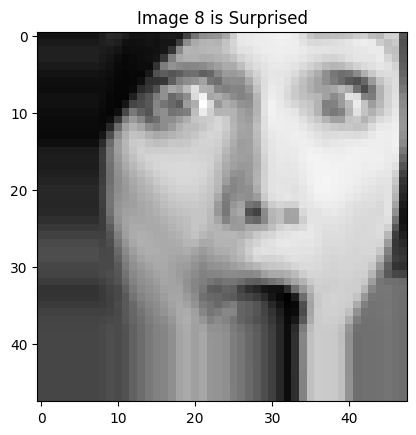

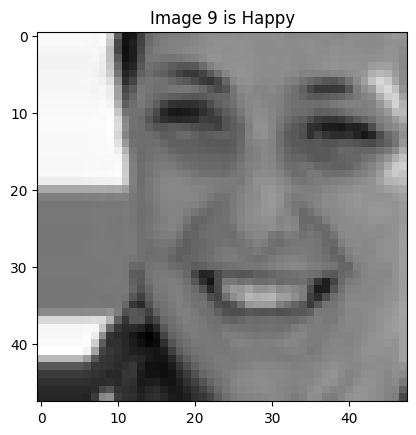

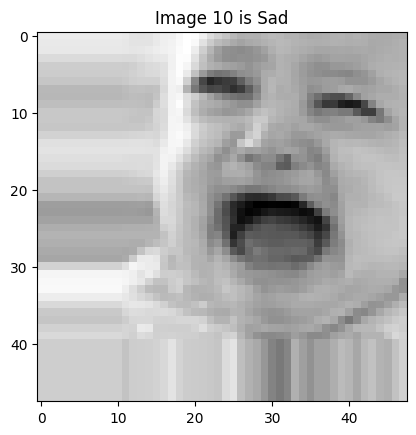

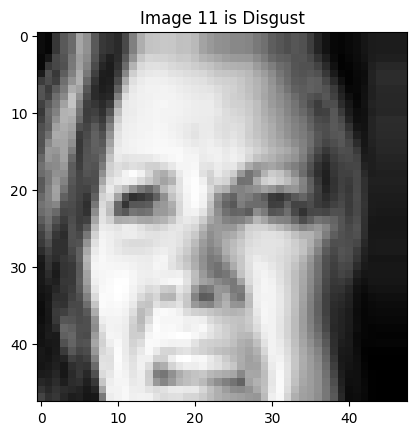

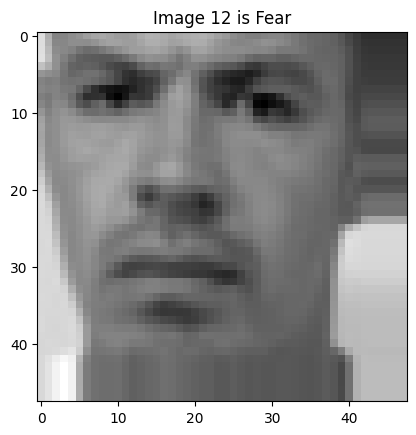

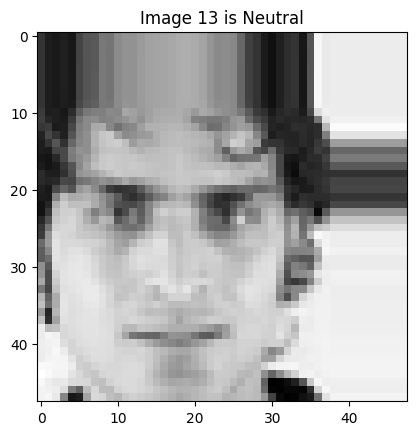

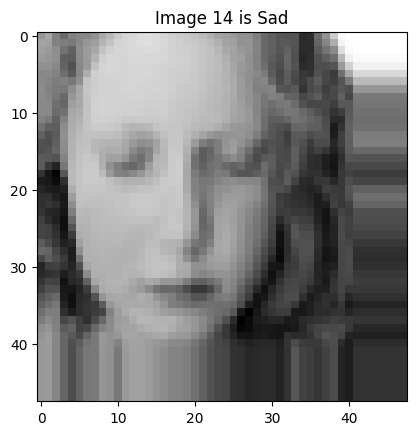

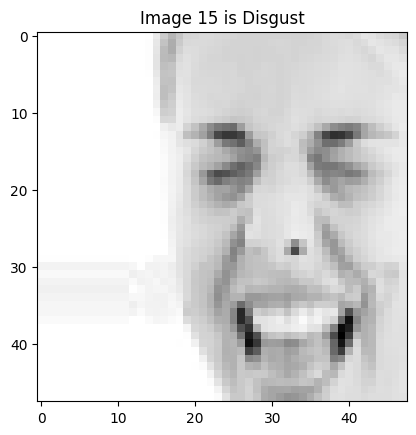

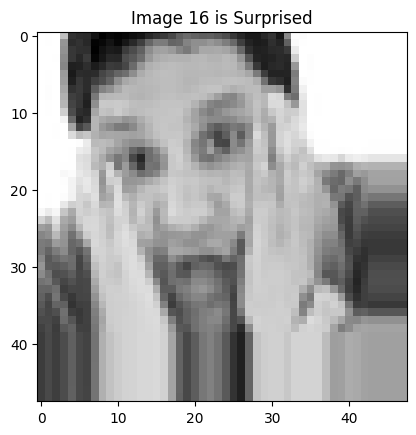

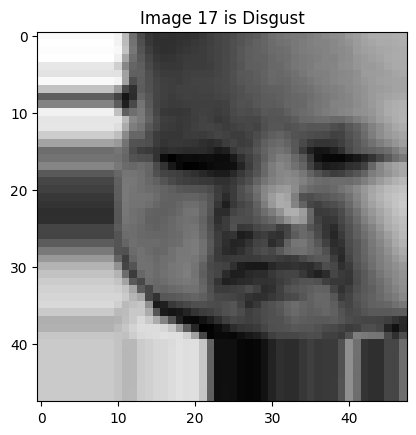

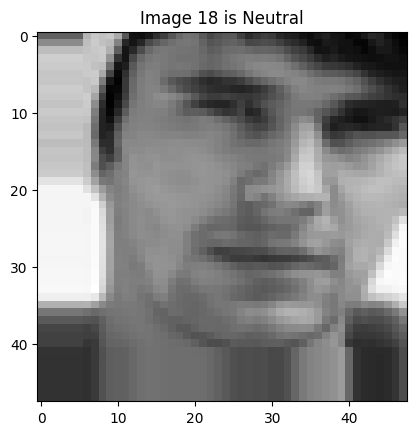

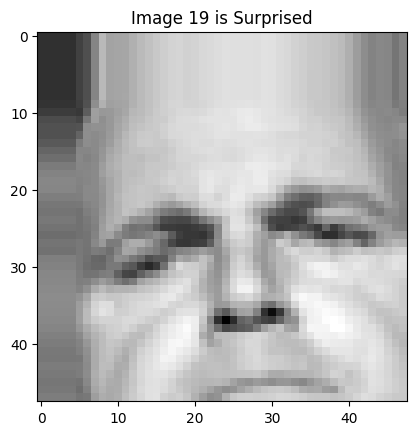

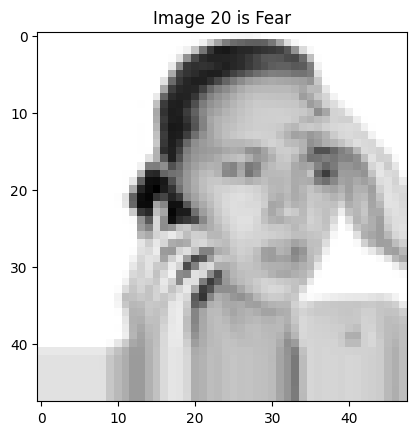

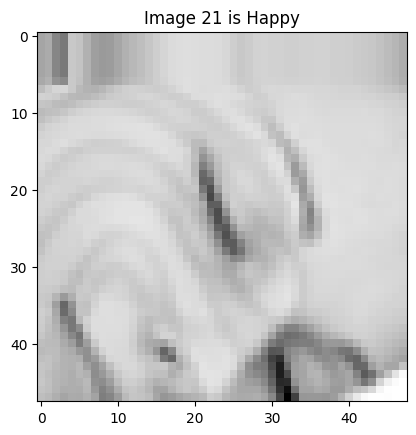

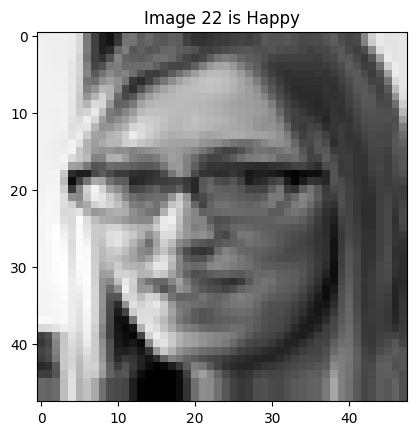

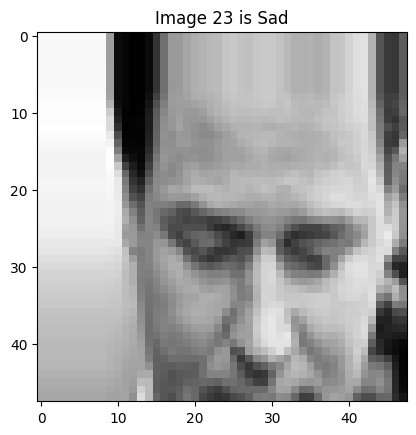

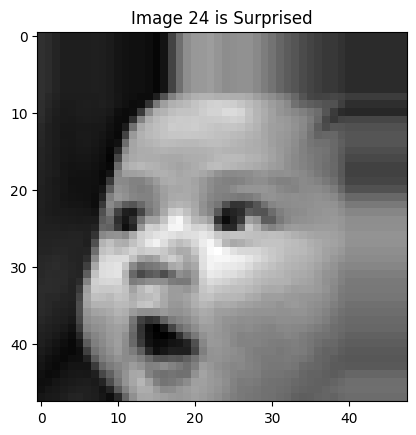

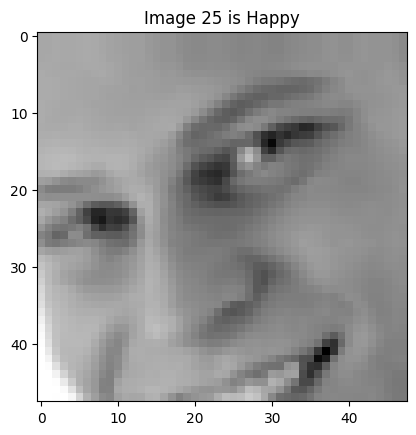

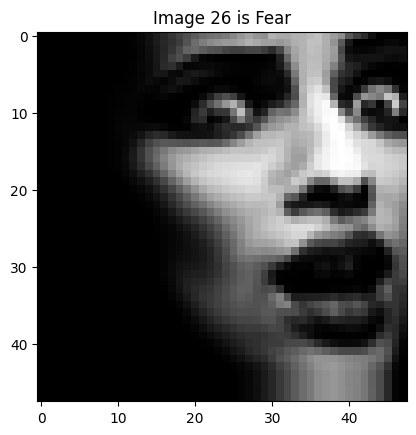

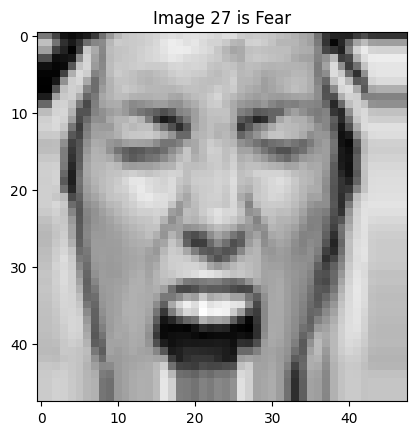

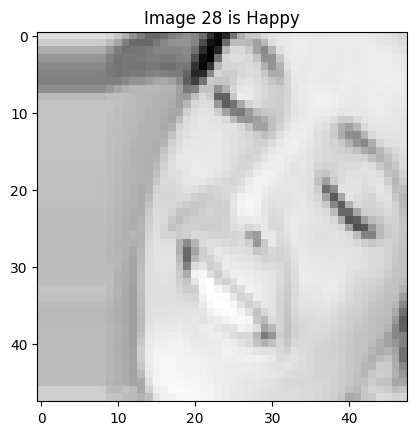

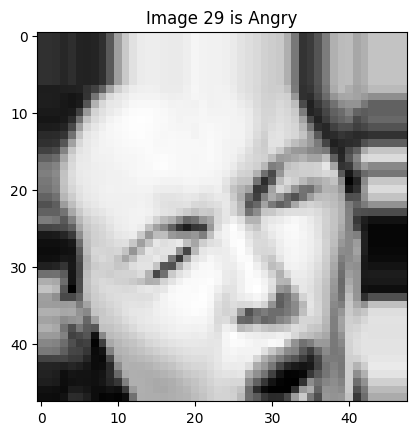

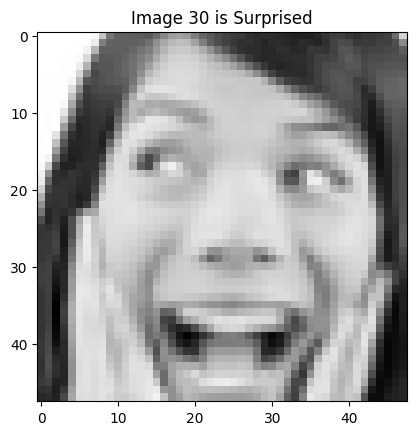

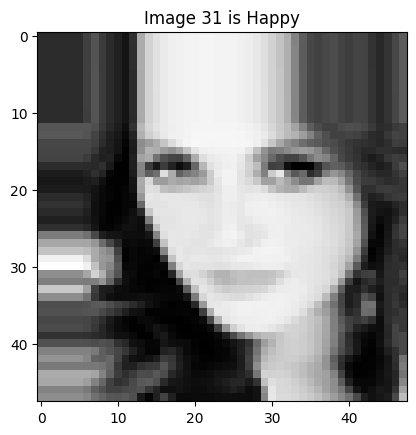

In [ ]:
for idx, img in enumerate(batchX):
  plt.figure()

  plt.imshow(batchX[idx].reshape((48, 48)), cmap = 'gray')
  item = batchy[idx].argmax(axis = 0)
  image = emotion[item]
  plt.title('Image %d is %s' % (idx, image))

# Building the CNN

In [ ]:

img_width, img_height = 48, 48
input_shape = (img_width, img_height, 1)

num_class = 7
batch_size = 32
epochs = 100

train_num = 28709
test_num = 7178

train_steps = train_num // batch_size
test_steps = test_num // batch_size

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential(name = 'Final_Project')

model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
model.add(layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "Final_Project"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                     

In [ ]:
from keras.optimizers import Adam
opt = tf.keras.optimizers.Adam()

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_iter,
                    batch_size = batch_size,
                    steps_per_epoch = train_steps,
                    epochs = epochs,
                    validation_steps = test_steps,
                    validation_data = test_iter)

Epoch 1/100
897/897 [==============================] - 32s 22ms/step - loss: 1.9064 - accuracy: 0.2182 - val_loss: 1.8539 - val_accuracy: 0.2342
Epoch 2/100
897/897 [==============================] - 20s 22ms/step - loss: 1.8713 - accuracy: 0.2371 - val_loss: 1.8299 - val_accuracy: 0.2786
Epoch 3/100
897/897 [==============================] - 19s 21ms/step - loss: 1.8491 - accuracy: 0.2506 - val_loss: 1.7978 - val_accuracy: 0.2859
Epoch 4/100
897/897 [==============================] - 20s 23ms/step - loss: 1.8297 - accuracy: 0.2651 - val_loss: 1.7392 - val_accuracy: 0.3220
Epoch 5/100
897/897 [==============================] - 19s 21ms/step - loss: 1.8096 - accuracy: 0.2807 - val_loss: 1.6999 - val_accuracy: 0.3538
Epoch 6/100
897/897 [==============================] - 20s 22ms/step - loss: 1.7794 - accuracy: 0.2998 - val_loss: 1.6453 - val_accuracy: 0.3824
Epoch 7/100
897/897 [==============================] - 18s 21ms/step - loss: 1.7605 - accuracy: 0.3149 - val_loss: 1.6232 - val_ac

In [ ]:
score = model.evaluate(test_iter)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

1034/1034 [==============================] - 5s 5ms/step - loss: 1.2531 - accuracy: 0.5352
Test loss: 1.2531338930130005
Test accuracy: 0.5352142453193665


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val).argmax(axis = 1)

confusion_matrix(y_val, y_pred)

1122/1122 [==============================] - 2s 2ms/step


array([[ 530,  917, 2672,  652,  130,   51,    1],
       [  37,  256,  204,   38,    8,    4,    0],
       [ 293,  812, 3254,  541,  132,   86,    3],
       [ 586,  858, 3133, 4122,  210,   78,    2],
       [ 499, 1178, 3165,  864,  299,   61,   11],
       [ 137,  421, 2860,  326,   43,  214,    1],
       [ 448, 1099, 3288,  925,  284,  142,   12]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.11      0.14      4953
           1       0.05      0.47      0.08       547
           2       0.18      0.64      0.27      5121
           3       0.55      0.46      0.50      8989
           4       0.27      0.05      0.08      6077
           5       0.34      0.05      0.09      4002
           6       0.40      0.00      0.00      6198

    accuracy                           0.24     35887
   macro avg       0.28      0.25      0.17     35887
weighted avg       0.35      0.24      0.21     35887



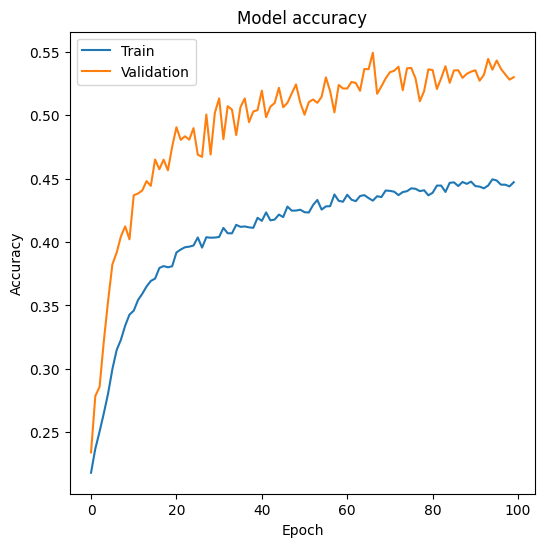

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
tf.keras.models.save_model(model, 'base_model.hdf5')